# Data Import

### Import Necessary Libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load the Dataset

In [49]:
path = r"add your file path"
salesreport = pd.read_csv(path, sep=',')

### Data Loading Verification

In [50]:
salesreport.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


The data appears to have been loaded correctly.

# Data validation

## Date type validation

To validate the data, we first identified whether each column is categorical or continuous. We determined that `customer_id`, `week`, `sales_method`, and `state` are categorical variables as they contain a limited set of distinct values. Conversely, `nb_sold`, `revenue`, `years_as_customer`, and `nb_site_visits` were classified as continuous variables due to their wide range of numerical values.

### Checking Pandas Data Types
To verify how Pandas has assigned data types to the columns, we utilize the `dtypes` attribute.

In [51]:
salesreport.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

Pandas initially categorized the `week` column as a numerical data type. Given the presence of only six distinct values, reclassifying it as a categorical variable is more suitable for analysis. Additionally, the `sales_method`, `customer_id`, and `state` columns will be converted from object data type to categorical to accurately represent their categorical nature.

In [52]:
salesreport['week'] = salesreport['week'].astype('category')
salesreport['sales_method'] = salesreport['sales_method'].astype('category')
salesreport['customer_id'] = salesreport['customer_id'].astype('category')
salesreport['state'] = salesreport['state'].astype('category')


In [53]:
salesreport.dtypes

week                 category
sales_method         category
customer_id          category
nb_sold                 int64
revenue               float64
years_as_customer       int64
nb_site_visits          int64
state                category
dtype: object

Upon re-inspection, all columns now exhibit correct data types.

## Column-Level Data Validation

In [54]:
salesreport.shape

(15000, 8)

### before Data Validation

The dataset contains **15000 rows and 8 columns** before cleaning and validataion.

### categorical columns

We will proceed with a detailed analysis of each column to verify data quality and consistency.

We will begin by examining the categorical columns: `sales_method`, `customer_id`, `state`, and the `week` column. These columns will be Inspected for inconsistencies, missing values, and unexpected data entries.

#### 1.`sales_method`

The `sales_method` column sholud include one of the three sales methods were used for that
customer

In [55]:
salesreport['sales_method'].isna().sum()

0

No missing values were detected

In [56]:
salesreport['sales_method'].value_counts()

sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64

Typographical errors resulting in inconsistent categories have been identified.

In [57]:
salesreport.loc[salesreport['sales_method'] == 'email', 'sales_method'] = 'Email'
salesreport.loc[salesreport['sales_method'] == 'em + call', 'sales_method'] = 'Email + Call'

In [58]:
salesreport['sales_method'] = salesreport['sales_method'].cat.remove_unused_categories()
salesreport['sales_method'].value_counts()

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64

The `sales_method` column has been validated 

#### 2.`customer_id`

The `customer_id`column should include the unique identifier for the customer

In [59]:
salesreport['customer_id'].isna().sum()

0

No missing values were detected

In [60]:
#verifing the uniqueness of customer IDs
salesreport['customer_id'].nunique()

15000

In [61]:
# verifing if all the have the same length
salesreport['customer_id'].map(len).nunique() == 1

True

No inconsistencies were found within the `customer_id` column.


The `customer_id` column has been validated 

#### 3. `state`

The `state` column should includ a string for the location of the customer

In [62]:
salesreport['state'].isna().sum()

0

No missing values were detected

In [63]:
salesreport['state'].value_counts()

state
California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Louisiana          230
Colorado           230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode

In [64]:
salesreport['state'].str.lower().nunique()

50

No inconsistencies were found within the `state` column.

The `state` column has been validated 

#### 4.`week`

The `week` column has the Week sale was made, counted as weeks since product launch

In [65]:
salesreport['week'].isna().sum()

0

No missing values were detected

In [66]:
salesreport['week'].value_counts()

week
1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: count, dtype: int64

No inconsistencies were found within the `week` column.

The `week` column has been validated 

### Continuous columns

The continuous data will be checked for errors, missing values, and unusual numbers that fall outside of expected ranges or patterns.

#### 1.`nb_sold`

This column should include number of new products sold for the customer

In [67]:
salesreport['nb_sold'].isnull().sum()

0

No missing values were detected

geting a summary statistic

In [68]:
salesreport['nb_sold'].describe()

count    15000.000000
mean        10.084667
std          1.812213
min          7.000000
25%          9.000000
50%         10.000000
75%         11.000000
max         16.000000
Name: nb_sold, dtype: float64

Based on the summary statistics, the data for this column appears to have no outliers. The values range from 7 to 16 with a mean of 10.008, indicating a relatively consistent distribution.

The `nb_sold` column has been validated 

#### 2. `revenue`

In [69]:
salesreport['revenue'].describe()

count    13926.000000
mean        93.934943
std         47.435312
min         32.540000
25%         52.470000
50%         89.500000
75%        107.327500
max        238.320000
Name: revenue, dtype: float64

This column should include revenue from the sales, rounded to 2 decimal places.

In [70]:
salesreport['revenue'].isnull().sum()

1074

The presence of missing values has been identified in the data. To assess the impact of these missing values on the analysis, it's crucial to determine if they are Missing Completely at Random (MCAR), Missing at Random (MAR), or Missing Not at Random (MNAR). This will involve investigating potential relationships between missingness and variables such as week, state and sales method.

In [71]:
salesreport.groupby('week')['revenue'].apply(lambda x: x.isnull().sum()).sort_values(ascending = False)


C:\Users\abood\AppData\Local\Temp\ipykernel_14116\2423260977.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salesreport.groupby('week')['revenue'].apply(lambda x: x.isnull().sum()).sort_values(ascending = False)


week
1    224
5    208
4    188
2    168
3    154
6    132
Name: revenue, dtype: int64

In [72]:
# Group by 'other_column' and calculate the percentage of missing values in 'column_with_missing_values'
salesreport.groupby('state')['revenue'].apply(lambda x: x.isnull().mean()).sort_values(ascending = False)



C:\Users\abood\AppData\Local\Temp\ipykernel_14116\4072986529.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salesreport.groupby('state')['revenue'].apply(lambda x: x.isnull().mean()).sort_values(ascending = False)


state
Delaware          0.205882
North Dakota      0.166667
Alaska            0.125000
Arkansas          0.106061
New Hampshire     0.094340
West Virginia     0.094118
Tennessee         0.094118
Kansas            0.091549
Florida           0.086283
Massachusetts     0.081633
Ohio              0.081272
Arizona           0.080997
Missouri          0.080386
Colorado          0.078261
Washington        0.077612
Indiana           0.076271
Pennsylvania      0.075251
Louisiana         0.073913
New Jersey        0.073733
South Dakota      0.073171
Utah              0.072581
Wisconsin         0.071146
California        0.071047
Virginia          0.069892
Hawaii            0.069444
Minnesota         0.069388
Maryland          0.068441
New York          0.068394
Connecticut       0.067039
Iowa              0.066667
Illinois          0.066451
Texas             0.065712
Oregon            0.065502
Michigan          0.064257
North Carolina    0.063181
Oklahoma          0.061224
New Mexico        0.05

In [73]:
salesreport.groupby('sales_method')['revenue'].apply(lambda x: x.isnull().mean()).sort_values(ascending = False)

C:\Users\abood\AppData\Local\Temp\ipykernel_14116\409633323.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salesreport.groupby('sales_method')['revenue'].apply(lambda x: x.isnull().mean()).sort_values(ascending = False)


sales_method
Email + Call    0.135692
Email           0.072864
Call            0.036477
Name: revenue, dtype: float64

Based on the analysis, there appears to be no significant relationship between the missing data and other categorical variables in the dataset. This suggests the data is Missing Completely at Random (MCAR)

Given that the missing data is primarily Missing Completely at Random (MCAR) and its relatively small volume, imputation has been selected as the preferred method for handling missing values. This approach preserves sample size while minimizing potential bias, ensuring robust subsequent analyses.

In [74]:
salesreport.dropna(inplace= True)

In [75]:
salesreport['revenue'].isnull().sum()

0

geting a summary statistic

In [76]:
salesreport['revenue'].describe()

count    13926.000000
mean        93.934943
std         47.435312
min         32.540000
25%         52.470000
50%         89.500000
75%        107.327500
max        238.320000
Name: revenue, dtype: float64

Given the high standard deviation of 47.4 and the maximum value being double the third quartile, there is potential for outliers. To identify these outliers, we will calculate the outlier threshold and closely examine data points exceeding this limit for any unusual patterns or behaviors.

In [77]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = salesreport['revenue'].quantile(0.25)
Q3 = salesreport['revenue'].quantile(0.75)
IQR = Q3 - Q1
# Calculate the thresholds
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)
# Identify outliers
salesreport[(salesreport['revenue'] < lower ) | (salesreport['revenue'] > upper )].describe()


,nb_sold,revenue,years_as_customer,nb_site_visits
count,634.000000,634.000000,634.000000,634.000000
mean,14.586751,219.427792,4.022082,28.652997
std,0.893834,15.484224,4.369160,2.968944
min,13.000000,189.630000,0.000000,20.000000
25%,15.000000,223.147500,1.000000,27.000000
50%,15.000000,226.385000,3.000000,29.000000
75%,15.000000,228.905000,5.000000,31.000000
max,16.000000,238.320000,26.000000,37.000000


Upon inspection, the identified outliers are primarily attributed to high numbers of items sold. This suggests potential high-performing sales or unusual sales events.

The `revenue` column has been validated 

#### 3.`years_as_customer`

The `years_as_customer` column should accurately reflect the number of years a customer has been purchasing from the company, with a theoretical maximum of 40 years since the company's founding in 1984. Any values exceeding this limit indicate potential data inconsistencies and require further investigation."

In [78]:
salesreport['years_as_customer'].isnull().sum()

0

No missing values were detected

geting a summary statistic

In [79]:
salesreport['years_as_customer'].describe()

count    13926.000000
mean         4.978960
std          5.047828
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         63.000000
Name: years_as_customer, dtype: float64

Based on the summary statistics, there appear to be potential data entry errors in the `years_as_customer` column, as the maximum value exceeds a possible upper limit of 40 years. We will investigate records with values greater than 40 to identify and correct these inconsistencies."

In [80]:
salesreport[salesreport['years_as_customer']> 40]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


Due to the lack of additional context and the minimal impact on the dataset, removing the two rows with inaccurate years_as_customer values is the recommended course of action.

In [81]:
salesreport = salesreport[salesreport['years_as_customer']<= 40]

In [82]:
salesreport[salesreport['years_as_customer']> 40]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


The `years_as_customer` column has been validated 

#### 4.`nb_site_visits`

This column should include, number of times the customer has visited our website
in the last 6 months


In [83]:
salesreport['nb_site_visits'].isnull().sum()

0

No missing values were detected

geting a summary statistic

In [84]:
salesreport['nb_site_visits'].describe()

count    13924.000000
mean        24.946926
std          3.491690
min         12.000000
25%         23.000000
50%         25.000000
75%         27.000000
max         37.000000
Name: nb_site_visits, dtype: float64

Based on the summary statistics, the data for this column appears to have no outliers. The values range from 12 to 36 with a mean of 24.9, indicating a relatively consistent distribution.

The `nb_site_visits` column has been validated 

### After Data Validation

In [85]:
salesreport.shape

(13924, 8)

After the data validation, the dataset contains **13924 rows and 8 columns** without missing values.

# Exploratory Analysis

### How many customers were there for each approach

Email was the most effective customer acquisition method, followed by phone calls, with hybrid approaches demonstrating the lowest amount of customers.

Text(0, 0.5, 'Number of Customers')

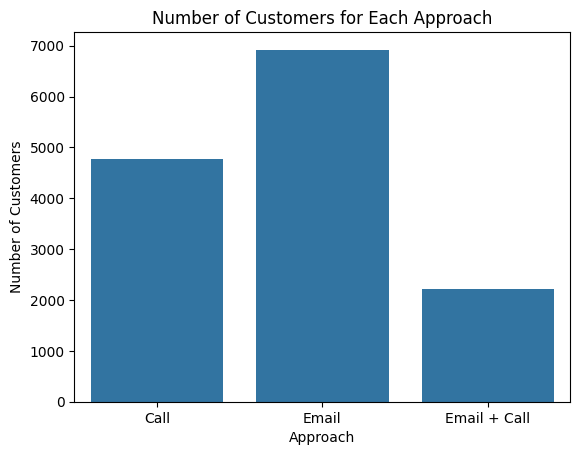

In [86]:
sns.countplot(data = salesreport , x='sales_method')
plt.title('Number of Customers for Each Approach')
plt.xlabel('Approach')
plt.ylabel('Number of Customers')

### What does the spread of the revenue look like overall? And for each method?

#### Spread of the revenue overall

The revenue distribution is notably right-skewed, with most values concentrated between 40 and 120, but extending up to 220. There's significant variability in the data, as evidenced by the wide spread in the histogram and the large box in the box plot. The distribution includes several high-value outliers that stretch the upper range of revenues.

Our revenue data shows a wide range, with most earnings falling between $40,000 and $120,000. However, we have some standout performers bringing in up to $220,000. This spread indicates diverse market performance.

[Text(0, 0, '0'),
 Text(20, 0, '20'),
 Text(40, 0, '40'),
 Text(60, 0, '60'),
 Text(80, 0, '80'),
 Text(100, 0, '100'),
 Text(120, 0, '120'),
 Text(140, 0, '140'),
 Text(160, 0, '160'),
 Text(180, 0, '180'),
 Text(200, 0, '200'),
 Text(220, 0, '220')]

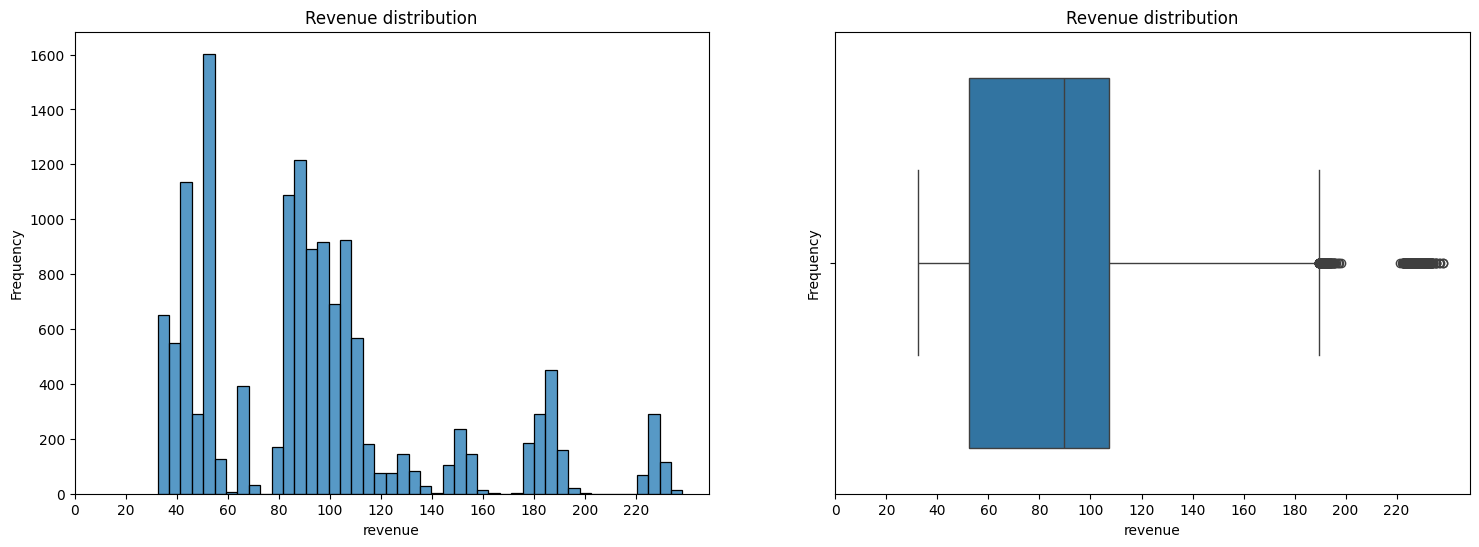

In [87]:
xticks = list(np.arange(0,salesreport['revenue'].max(),20).astype(int))
xlabels = [str(x) for x in xticks]
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(data=salesreport, x='revenue', ax=axes[0])
axes[0].set_ylabel("Frequency") 
axes[0].set_title("Revenue distribution")
axes[0].set_xticks(xticks)  
axes[0].set_xticklabels(xlabels)  
sns.boxplot(data=salesreport, x='revenue', ax=axes[1], meanline=True)
axes[1].set_ylabel("Frequency") 
axes[1].set_title("Revenue distribution")
axes[1].set_xticks(xticks)  
axes[1].set_xticklabels(xlabels)  

#### The spread of the revenue for each method?

The box plot compares revenue distributions across three sales methods. Call sales have the lowest median and least variability. Email sales show a higher median with more spread and some high outliers. Email + Call exhibits the highest median revenue and widest distribution, indicating the greatest variability and potential for high earnings.

Our sales data reveals interesting patterns across different methods. Cold calling yields consistent but lower revenues. Email marketing shows better overall performance with some standout successes. However, our combined email and call approach is the clear winner, generating the highest average sales and greatest potential for big deals. While it's the most variable, it's also proving to be our most lucrative strategy. This suggests we should focus on refining and expanding our integrated email and call campaigns to maximize our revenue potential..

[Text(0, 0, '0'),
 Text(20, 0, '20'),
 Text(40, 0, '40'),
 Text(60, 0, '60'),
 Text(80, 0, '80'),
 Text(100, 0, '100'),
 Text(120, 0, '120'),
 Text(140, 0, '140'),
 Text(160, 0, '160'),
 Text(180, 0, '180'),
 Text(200, 0, '200'),
 Text(220, 0, '220')]

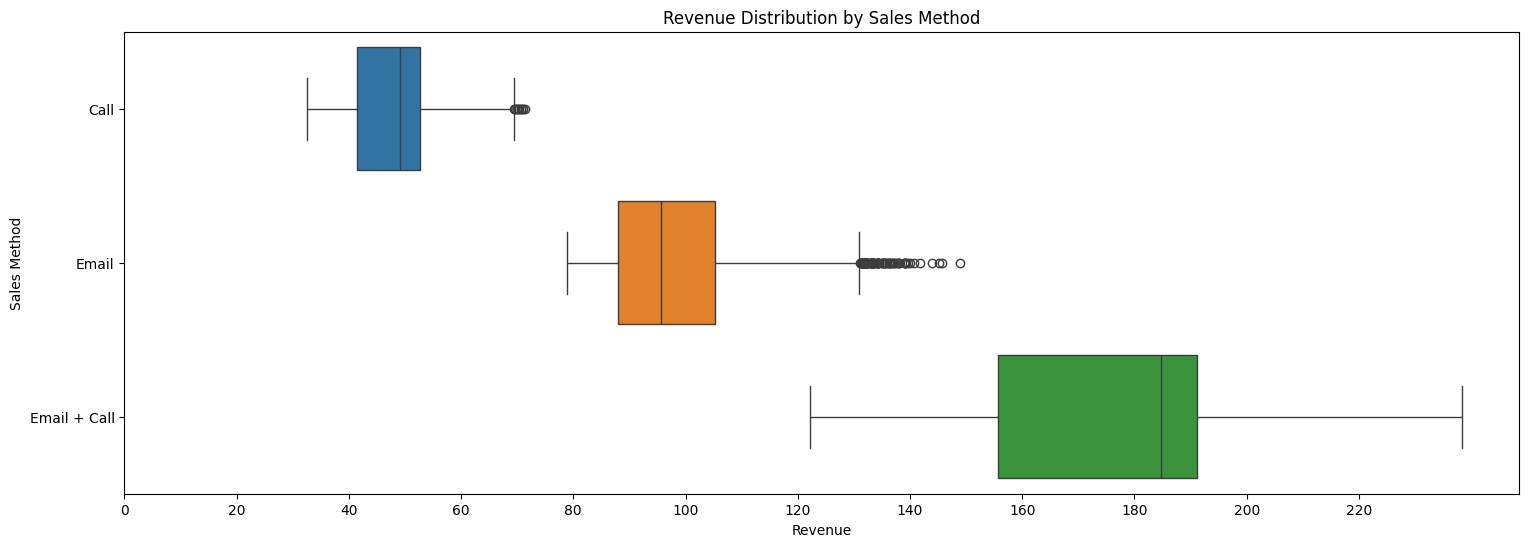

In [88]:
xticks = list(np.arange(0,salesreport['revenue'].max(),20).astype(int))
xlabels = [str(x) for x in xticks]
fig, axes = plt.subplots(1, 1, figsize=(18, 6))
sns.boxplot( y='sales_method',x='revenue',hue='sales_method', data=salesreport, ax = axes)
axes.set_title("Revenue Distribution by Sales Method")
axes.set_xlabel("Revenue")
axes.set_ylabel("Sales Method")
axes.set_xticks(xticks)  
axes.set_xticklabels(xlabels)  

#### Was there any difference in revenue over time for each of the methods

Revenue from all sales methods increased over six weeks. The "Email + Call" method consistently generated the highest revenue, showing the most significant growth. The "Email" method also saw positive growth, while the "Call" method had the slowest increase. These findings suggest a combined sales approach is most effective, but there's potential for improvement in email and call strategies.

Text(0, 0.5, 'Revenue')

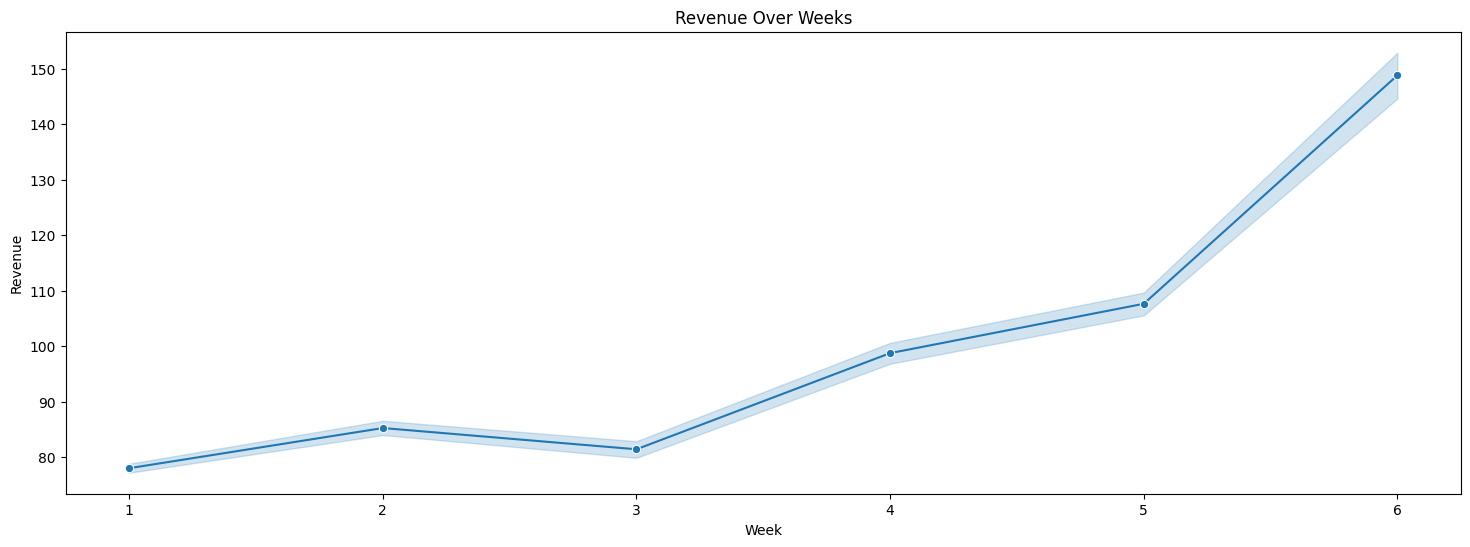

In [89]:
fig, ax = plt.subplots(figsize=(18, 6))

# Plot line plot
sns.lineplot(x='week', y='revenue', data=salesreport, ax=ax, marker='o')

# Set titles and labels
ax.set_title("Revenue Over Weeks")
ax.set_xlabel("Week")
ax.set_ylabel("Revenue")


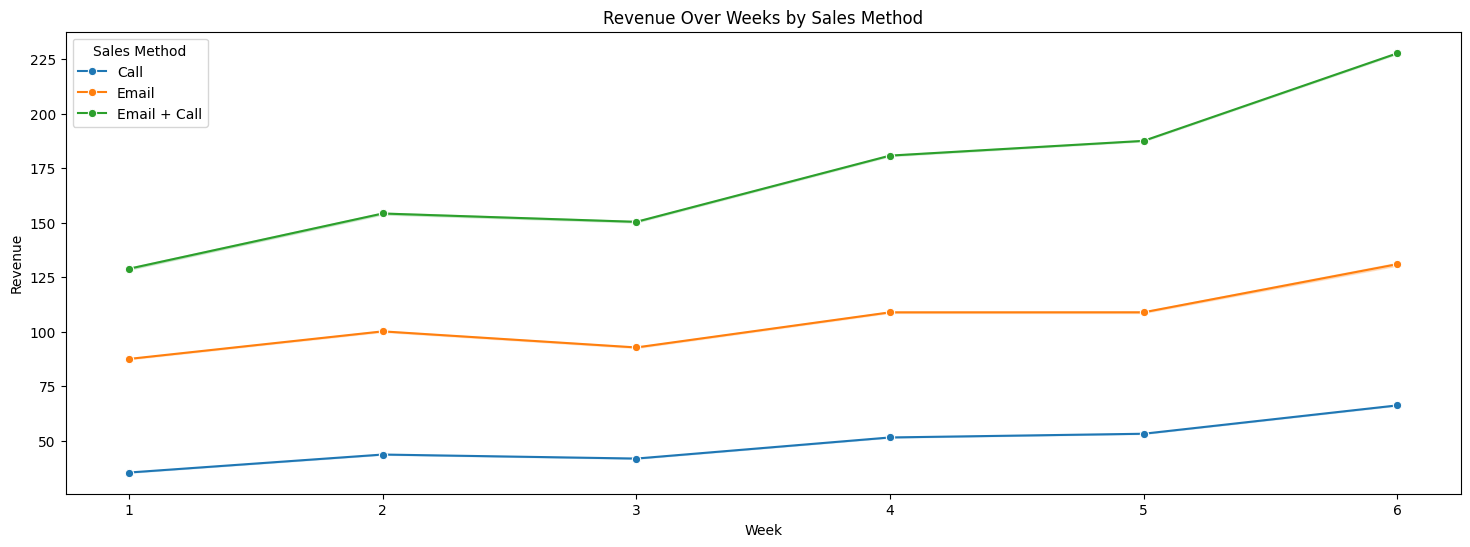

In [90]:
fig, ax = plt.subplots(figsize=(18, 6))

# Plot line plot with different lines for each sales method
sns.lineplot(x='week', y='revenue', hue='sales_method', data=salesreport, ax=ax, marker='o')

# Set titles and labels
ax.set_title("Revenue Over Weeks by Sales Method")
ax.set_xlabel("Week")
ax.set_ylabel("Revenue")

# Add legend
ax.legend(title='Sales Method')

plt.show()

#### recommend sales approach

Based on the data analysis, the sales team should **prioritize the email + call approach**. This method consistently generates the highest revenue while maintaining a relatively low customer interaction time of 10 minutes. While the email-only approach also yields positive results, the incremental time investment for a brief follow-up call is justified by the potential for increased revenue. Conversely, the call-only method demonstrates lower revenue generation and a significantly higher time commitment of approximately 30 minutes per customer, making it less efficient.

### Business Metrics


Given the company's objective to sustain high revenue while adopting innovative sales strategies, the **"email + call" approach percentage is a key business metric**. This metric currently stands at 15.97% of total sales. This method demonstrates high revenue growth while maintaining efficient resource allocation and time efficiency, aligning with the company's goals. A strategic priority is to increase the utilization of this sales tactic. Additionally, **overall revenue remains a crucial performance indicator** for assessing overall company performance.

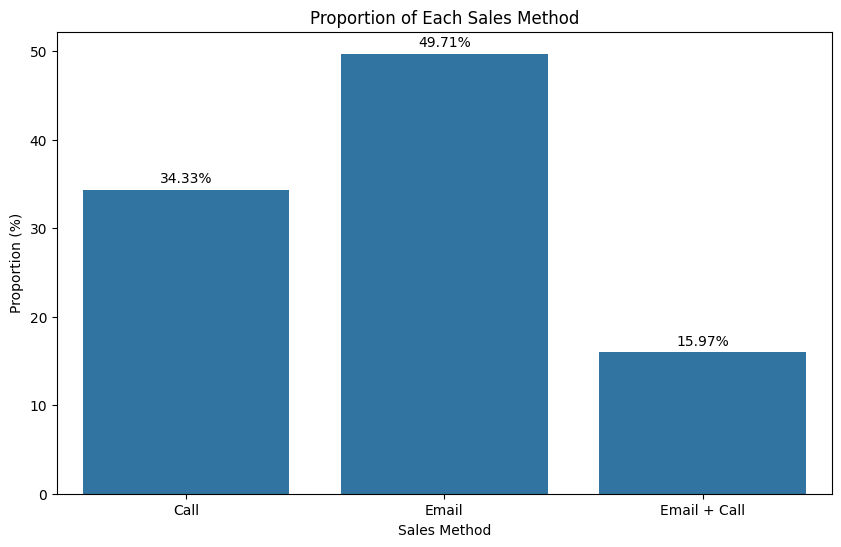

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming salesreport is a DataFrame with 'sales_method' column
# salesreport = pd.read_csv('path_to_your_data.csv')

# Calculate the proportion of each sales method
sales_method_counts = salesreport['sales_method'].value_counts(normalize=True)
sales_method_proportions = sales_method_counts * 100  # Convert to percentage

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=sales_method_proportions.index, y=sales_method_proportions.values, ax=ax)

# Annotate each bar with the proportion value
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.2f}%', ha='center', va='bottom')

# Set titles and labels
ax.set_title("Proportion of Each Sales Method")
ax.set_xlabel("Sales Method")
ax.set_ylabel("Proportion (%)")

plt.show()

# Business Metrics

Given the company's objective to sustain high revenue while adopting innovative sales strategies, the **"email + call" approach percentage is a key business metric**. This metric currently stands at **15.97%** of total sales. This method demonstrates high revenue growth while maintaining efficient resource allocation and time efficiency, aligning with the company's goals. A strategic priority is to increase the utilization of this sales tactic. Additionally, **overall revenue remains a crucial performance indicator** for assessing overall company performance.

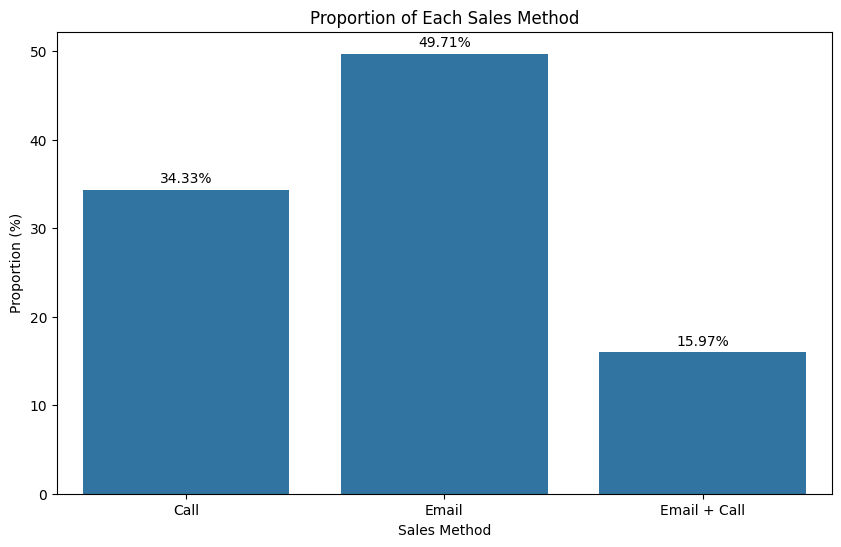

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming salesreport is a DataFrame with 'sales_method' column
# salesreport = pd.read_csv('path_to_your_data.csv')

# Calculate the proportion of each sales method
sales_method_counts = salesreport['sales_method'].value_counts(normalize=True)
sales_method_proportions = sales_method_counts * 100  # Convert to percentage

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=sales_method_proportions.index, y=sales_method_proportions.values, ax=ax)

# Annotate each bar with the proportion value
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.2f}%', ha='center', va='bottom')

# Set titles and labels
ax.set_title("Proportion of Each Sales Method")
ax.set_xlabel("Sales Method")
ax.set_ylabel("Proportion (%)")

plt.show()

# Final summary and recommendations

## Final Summary:
The analysis focused on evaluating different sales methods to determine the most effective strategy for maximizing revenue while minimizing customer interaction time. The dataset underwent thorough validation, with key findings highlighting the following:

**Sales Methods Evaluation:**
- The "email + call" method consistently generated the highest revenue with the least customer interaction time, making it the most efficient and effective approach.
- The "email-only" method also showed positive results, though slightly less effective than the "email + call" combination.
- The "call-only" method was the least efficient, requiring more time and generating lower revenue.
**Business Metrics:**
- The percentage of sales using the "email + call" approach is a critical business metric, currently standing at 15.97% of total sales.
- Overall revenue remains a key performance indicator for the company.
## Recommendations:
**Prioritize the "Email + Call" Sales Method**:
- Encourage the sales team to focus on the "email + call" approach to optimize both revenue and time efficiency.
- Consider training and resources to further improve the effectiveness of this method.

**Monitor and Increase the Use of the "Email + Call" Approach:**
- Set targets to increase the utilization of this sales method, given its proven effectiveness.
- Regularly track the percentage of sales using this approach as a key business metric.

**Optimize Resource Allocation:**
- Reduce reliance on the "call-only" method, as it is less efficient and more time-consuming.
- Allocate resources to support the more effective sales strategies, such as "email + call" and "email-only" methods.